



{% include toc title="In This Lesson" icon="file-text" %}



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Calculate `dNBR` in `R`

* Be able to describe how the `dNBR` index is used to quantify fire severity.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What You Need



You will need a computer with internet access to complete this lesson and the

data for week 6 of the course.



{% include/data_subsets/course_earth_analytics/_data-cold-springs-fire.md %}

</div>



## Calculate Normalized Burn Ratio (NBR)



The Normalized burn ratio (NBR) is used to identify burned areas. The formula

is similar to a normalized difference vegetation index (NDVI), except that it

uses near-infrared (NIR) and shortwave-infrared (SWIR) portions of the

electromagnetic spectrum (Lopez, 1991; Key and Benson, 1995).



<figure class="half">

 <a href="{{ site.url}}/images/courses/earth-analytics/week-6/nbr_index.png">

 <img src="{{ site.url}}/images/courses/earth-analytics/week-6/nbr_index.png" alt="NBR - US Forest Service."></a>

    <figcaption>The normalized burn ratio (NBR) index uses the shortwave-infrared (SWIR) and near-infrared (NIR) portions of the electromagnetic

    spectrum.

    </figcaption>

</figure>



The NIR and SWIR parts of the electromagnetic spectrum are a powerful combination

of bands to use for this index given vegetation reflects strongly in the NIR region

of the electromagnetic spectrum and weekly in the SWIR. Alternatively, it has been

shown that a fire scar which contains scarred woody vegetation and earth will

reflect more strongly in the SWIR part of the electromagnetic spectrum and beyond

(see figure below).





<figure>

 <a href="{{ site.url}}/images/courses/earth-analytics/week-6/barc_spectral_response_US_forest_service.png">

 <img src="{{ site.url}}/images/courses/earth-analytics/week-6/barc_spectral_response_US_forest_service.png" alt="NBR - US Forest Service."></a>

    <figcaption>Plants reflect strongly in the NIR portion of the spectrum but

    spectrun. reflect much less strongly in the SWIR portion which makes this combination powerful for identifying areas with standing dead stems (fire scarred wood / bark) and soil / earth. Source: US Forest Service

    </figcaption>

</figure>





## NBR Bands



The NBR index was originally developed for use with Landsat TM and ETM+ bands 4 and 7,

but it will work with any multispectral sensor with a NIR

band between 760 - 900 nm and a SWIR band between 2080 - 2350 nm. Thus this

index can be used with both Landsat 8, MODIS and other multi (and hyper) spectral

sensors.



## Difference NBR



The Normalized Burn Ratio is most powerful as a tool to better understand fire

extent and severity when used after calculating the difference between pre and post

fire conditions. This

difference is best measured immediate before the fire and then immediately after.

NBR is less effective if time has passed and vegetation regrowth / regeneration

has begun. Once vegetation regeneration has begun, the fire scar will begin

to reflect a stronger signal in the NIR portion of the spectrum (remember that

healthy plants reflect strongly in the NIR portion due to the properties of

chlorophyll).



For this reason, the NBR ratio works better in areas like the United States where

plant regeneration is expected to occur more slowly. In areas like the tropics

which are wet and characterized by rapid regrowth, NBR may be less effective.



To calculate the difference, we subtract the post-fire NBR raster from the pre-fire

NBR raster as follows:



<figure>

 <a href="{{ site.url}}/images/courses/earth-analytics/week-6/dnbr-equation.jpg">

 <img src="{{ site.url}}/images/courses/earth-analytics/week-6/dnbr-equation.jpg" alt="NBR - US Forest Service."></a>

    <figcaption>difference NBR (dNBR) equation. Source: http://gsp.humboldt.edu/olm_2015/Courses/GSP_216_Online/lesson5-1/NBR.html

    </figcaption>

</figure>



The classification table below can be used to classify the raster according to

the severity of the burn.



| SEVERITY LEVEL  | | dNBR RANGE |

|------------------------------|

| Enhanced Regrowth | | < -.1 |

| Unburned       |  | -.1 to +.1 |

| Low Severity     | | +.1 to +.27 |

| Moderate Severity  | | +.27 to +.66 |

| High Severity     |  | > .66 |



### How severe is severe?



It is important to keep in mind that that the classification table above is one

quantitative interpretation of what the results of dNBR actually mean. The term

"severity" is a qualitative term that could be quantitied in different ways.

For instance, who is to say that .5 couldn't be representative of "high severity"

vs .66?



As scientists, the best way to make sure our classification approaches represent

what is actually happening ont he ground in terms of fire severity is to check

out the actual conditions on the ground. This process of confirming a value that

we get from remote sensing data by checking it on the ground is called validation.



### NBR & water - false positives



The NBR index can be a powerful tool to identify pixels that have a high likelyhood

or being "burned". However it is important to know that this index is also

sensitive to water and thus sometimes, pixels that are classified as "high severity"

may actually be water. Because of this, it is important to mask out areas of water

PRIOR to performing any quantitative analysis on the difference NBR results.



### NBR & Landsat 8



The table below which shows the band distribution of Landsat 8. These bands

are different from Landsat 7. What

bands should we use to calculate NBR using Landsat 8?



#### Landsat 8 Bands



| Band | Wavelength range (nanometers) | Spatial Resolution (m) | Spectral Width (nm)|

|-------------------------------------|------------------|--------------------|----------------|

| Band 1 - Coastal aerosol | 430 - 450 | 30 | 2.0 |

| Band 2 - Blue | 450 - 510 | 30 | 6.0 |

| Band 3 - Green | 530 - 590 | 30 | 6.0 |

| Band 4 - Red | 640 - 670 | 30 | 0.03 |

| Band 5 - Near Infrared (NIR) | 850 - 880 | 30 | 3.0 |

| Band 6 - SWIR 1 | 1570 - 1650 | 30 | 8.0  |

| Band 7 - SWIR 2 | 2110 - 2290 | 30 | 18 |

| Band 8 - Panchromatic | 500 - 680 | 15 | 18 |

| Band 9 - Cirrus | 1360 - 1380 | 30 | 2.0 |





### NBR & MODIS



Similarly the table below shows the band ranges for the MODIS sensor. What bands

should we use to calculate NBR using MODIS?



| Band | Wavelength range (nm) | Spatial Resolution (m) | Spectral Width (nm)|

|-------------------------------------|------------------|--------------------|----------------|

| Band 1 - red | 620 - 670 | 250 | 2.0 |

| Band 2 - near infrared | 841 - 876 | 250 | 6.0 |

| Band 3 -  blue/green | 459 - 479 | 500 | 6.0 |

| Band 4 - green | 545 - 565 | 500 | 3.0 |

| Band 5 - near infrared  | 1230 – 1250 | 500 | 8.0  |

| Band 6 - mid-infrared | 1628 – 1652 | 500 | 18 |

| Band 7 - mid-infrared | 2105 - 2155 | 500 | 18 |








In [14]:
import rasterio as rio
import geopandas as gpd
import earthpy as et
import numpy as np
import seaborn as sns
import numpy.ma as ma
import os
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
import matplotlib.pyplot as plt
from rasterio.plot import show
from glob import glob
plt.ion()
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.titlesize'] = 20

In [16]:
# here we just setup the raster reader object
# where as : 2017-02-22-spectral06-calculate-NBR-with-landsat-python we create an array from all of the bands. 
# it seems that the best practice is to just create an array of the bands that we need to use 
# and perform the clean up on just those bands. 
all_landsat_bands_pre = glob("data/week_06/landsat/LC80340322016205-SC20170127160728/crop/*band*.tif")
all_landsat_bands_pre = [rio.open(ifile) for ifile in all_landsat_bands_pre]
all_landsat_bands_pre[1].meta


{'affine': Affine(30.0, 0.0, 455655.0,
       0.0, -30.0, 4428465.0),
 'count': 1,
 'crs': CRS({'init': 'epsg:32613'}),
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 177,
 'nodata': -1.7e+308,
 'transform': (455655.0, 30.0, 0.0, 4428465.0, 0.0, -30.0),
 'width': 246}

In [17]:
print(all_landsat_bands[1].nodatavals)


(-1.7e+308,)


In [25]:
# law: adding create array from all bands 
all_landsat_bands_post_data = np.array([ifile.read()[0] for ifile in all_landsat_bands_pre])
# assign any value smaller than 0 to mask = True
all_landsat_bands_post_data = ma.masked_where(all_landsat_bands_pre_data < 0, all_landsat_bands_pre_data)
all_landsat_bands_post_data[1]

masked_array(data =
 [[ 419.  421.  467. ...,  136.  145.  148.]
 [ 301.  385.  443. ...,  141.  151.  177.]
 [ 263.  339.  336. ...,  162.  176.  197.]
 ..., 
 [ 406.  272.  313. ...,  161.  154.  164.]
 [ 304.  558.  351. ...,  157.  150.  155.]
 [ 242.  117.  179. ...,  167.  165.  166.]],
             mask =
 False,
       fill_value = 1e+20)

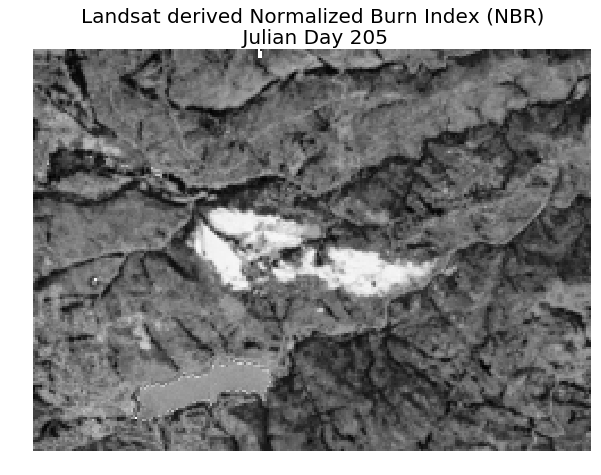

In [26]:
# it makes a lot of sense to only read in the bands that you need to perform the calculation
# again a helper function could be really nice 
# it could take the bands of interest as an input and maybe a list of tifs? idk.

# calculate nbr
landsat_nbr_post = ((all_landsat_bands_pre_data[4] - all_landsat_bands_pre_data[6]) / 
                   (all_landsat_bands_pre_data[4] + all_landsat_bands_pre_data[6]))

# we can't set values of nan to 0 as 0 is a valid value in the NBR index
#landsat_nbr[np.isnan(landsat_nbr)] = 0
fig, ax = plt.subplots()
ax.imshow(landsat_nbr_pre, cmap='Greys')
ax.set(title="Landsat derived Normalized Burn Index (NBR)\n Julian Day 205")
ax.set_axis_off();



When you have calculated NBR - classify the output raster using the `classify()`

function and the classes below.



| SEVERITY LEVEL  | | dNBR RANGE |

|------------------------------|

| Enhanced Regrowth | |   > -.1 |

| Unburned       |  | -.1 to + .1 |

| Low Severity     | | +.1 to +.27 |

| Moderate Severity  | | +.27 to +.66 |

| High Severity     |  |  > +.66  |



NOTE: your min an max values for NBR may be slightly different from the table

shown above! If you have a smaller min value (< -700) then adjust your first class

to that smallest number. If you have a largest max value (>1300) then adjust

your last class to that largest value in your data.



Alternatively, you can set those values to NA if you think they are outside of

the valid range of NBR (in this case they are not).




# note that i am not doing the subtraction in this lesson...
# need to fix

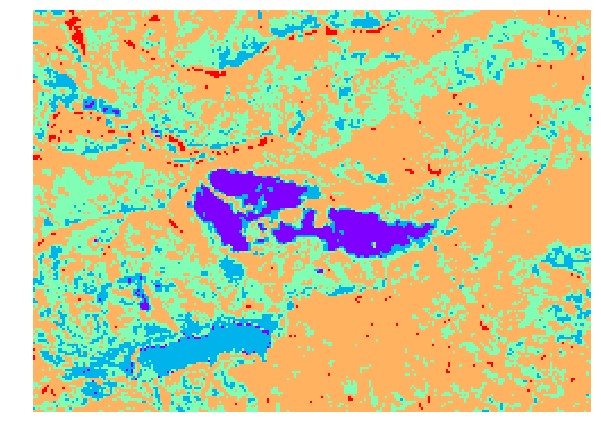

In [27]:
# classify the data according to NBR classes
nbr_classified = np.digitize(landsat_nbr, [-.1, .1, .27, .66, np.inf])

# plot classified raster
fig, ax = plt.subplots()
ax.imshow(nbr_classified, cmap='rainbow')
ax.set_axis_off()



Your classified map should look something like:






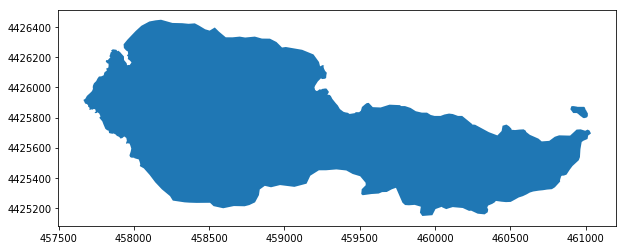

In [28]:
# Using geopandas - 
# this map was purplse and now it's blue
fire_boundary = gpd.read_file("data/week_06/vector_layers/fire-boundary-geomac/co_cold_springs_20160711_2200_dd83.shp")
# reproject the fire boundary
fire_boundary = fire_boundary.to_crs(all_landsat_bands[0].crs)
fire_boundary.plot();

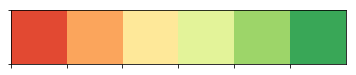

In [29]:
# create a color pallette
sns.palplot(sns.palettes.color_palette('RdYlGn'))

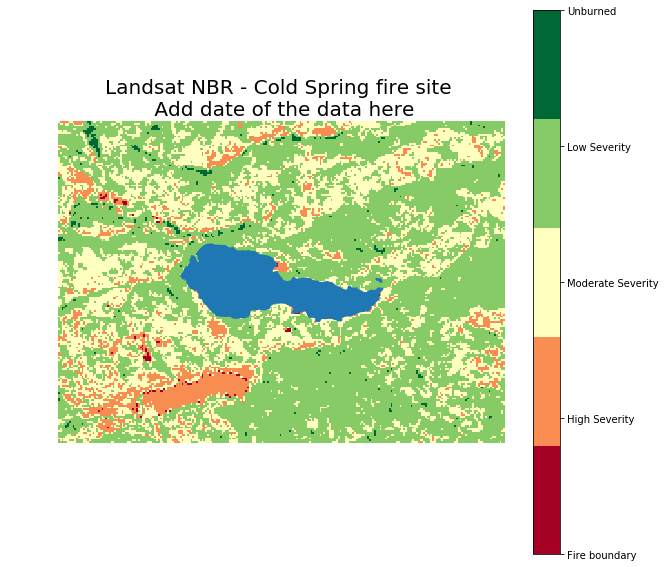

In [31]:
fig, ax = plt.subplots()
category_labels = ["Enhanced Regrowth", "Unburned", "Low Severity", "Moderate Severity", "High Severity", "Fire boundary"]
bounds = all_landsat_bands[0].bounds
im = ax.imshow(nbr_classified, cmap=plt.cm.get_cmap('RdYlGn', 5), extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
ax.set(title="Landsat NBR - Cold Spring fire site \n Add date of the data here")
fire_boundary.plot(ax=ax)
cbar = fig.colorbar(im)
cbar.set_ticks(range(5))
cbar.set_ticklabels(category_labels[::-1])
ax.set_axis_off()

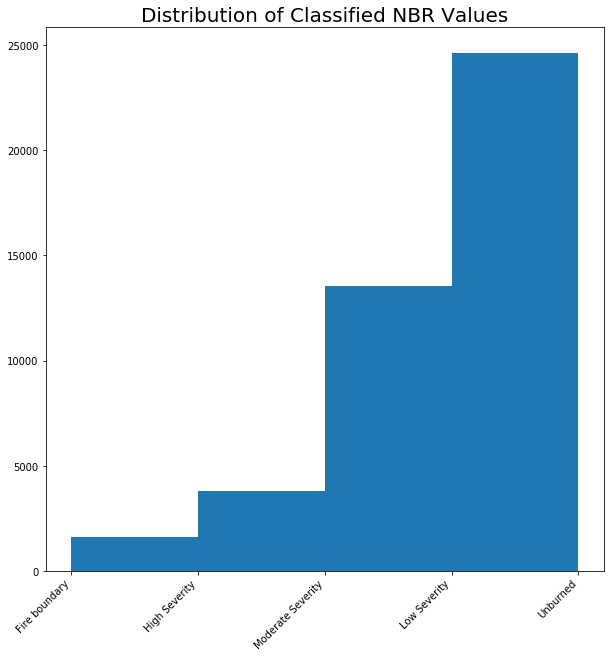

In [32]:
fig, ax = plt.subplots()
ax.hist(nbr_classified.ravel(), bins=range(5))
ax.set(xticks=range(5), title="Distribution of Classified NBR Values")
ax.set_xticklabels(category_labels[::-1], rotation=45, horizontalalignment='right');